In [12]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from numpy.random import normal

from muldoon import met_timeseries
from muldoon.utils import modified_lorentzian

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


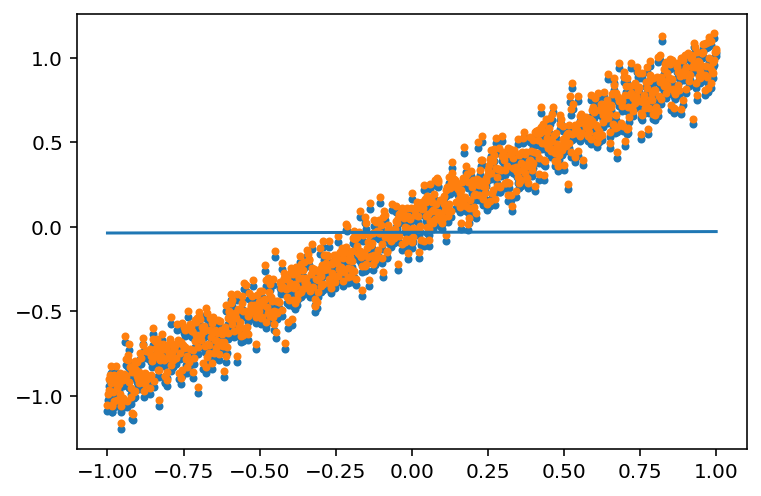

In [15]:
# Create time-series
time = np.linspace(-1, 1, 1000)
baseline = 0.
slope = 1.
t0 = 0.
DeltaP = 0.
Gamma = 0.1

profile = modified_lorentzian(time, baseline, slope, t0, DeltaP, Gamma) + normal(scale=slope/10., size=len(time))

mt = met_timeseries(time, profile)

# Detrend
window_size = int(10*Gamma/delta_t)
detrended_pressure = mt.detrend_pressure_timeseries(window_size)

plt.scatter(mt.time, mt.pressure, marker='.')
plt.scatter(mt.time, mt.detrended_pressure, marker='.')
plt.plot(mt.time, mt.pressure_trend)